In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

EDA

In [2]:
df = pd.read_csv('HousingData.csv')

The column header abbrivations stand for:
CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment 
RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percent lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
print(len(df))

506


There are 20 missing values in the CRIM, ZN, INDUS, CHAS, AGE, and LSTAT columns. Even though this is less and 5% of the total number of rows, I am still going fill these rows using the mean value to preserve the data as we only have 506 rows to work with.

In [8]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

features_to_impute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
df[features_to_impute] = mean_imputer.fit_transform(df[features_to_impute])

In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

identify outliers


I identified outliers using the IQR method because it is robust and resistant to extreme values. It also is non-parametric, adjustable (sensitivity) and easy to follow

In [10]:
def identify_outliers_iqr(data, column_name):
    Q1 = np.percentile(data[column_name], 25)
    Q3 = np.percentile(data[column_name], 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

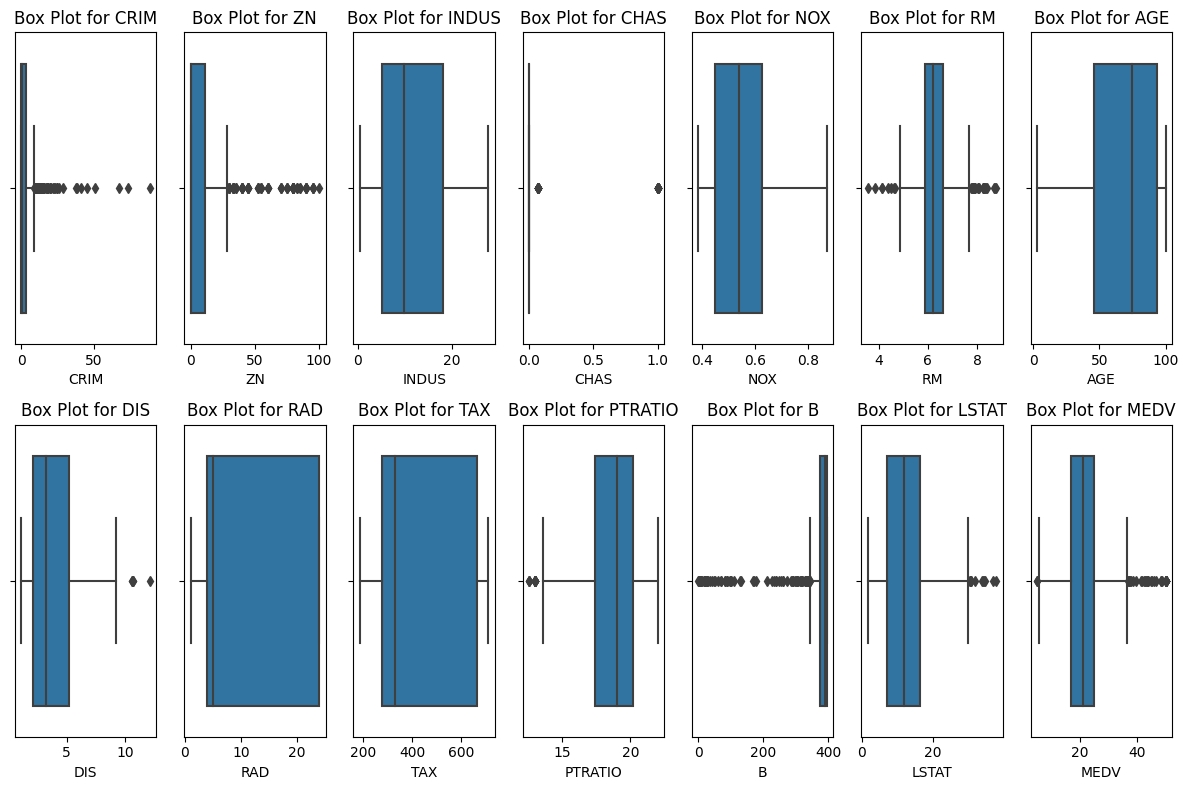

In [11]:
plt.figure(figsize=(12, 8))
num_columns = len(df.columns)

for i, column_name in enumerate(df.columns):
    plt.subplot(2, num_columns//2, i + 1)
    sns.boxplot(x=df[column_name])
    plt.title(f'Box Plot for {column_name}')
    outliers = identify_outliers_iqr(df, column_name)
    #print(f"Identified outliers in {column_name}:")
    #print(outliers)

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [13]:
cols_to_handle_outliers = ['CRIM','ZN','CHAS','RM','DIS','PTRATIO','B','LSTAT','MEDV']

for col in cols_to_handle_outliers:
    df[f'{col}_winsorized'] = stats.mstats.winsorize(df[col], limits=[0.05, 0.05])

cols_to_scale = [f'{col}_winsorized' for col in cols_to_handle_outliers]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cols_to_scale]) 
df[cols_to_scale] = scaled_features

In [14]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,MEDV,CRIM_winsorized,ZN_winsorized,CHAS_winsorized,RM_winsorized,DIS_winsorized,PTRATIO_winsorized,B_winsorized,LSTAT_winsorized,MEDV_winsorized
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,...,24.0,-0.606334,0.322525,-0.279851,0.494143,0.179237,-1.579923,0.460365,-1.174330,0.193332
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,...,21.6,-0.606334,-0.498077,-0.279851,0.230385,0.630473,-0.345989,0.460365,-0.528917,-0.095666
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,...,34.7,-0.606334,-0.498077,-0.279851,1.538903,0.630473,-0.345989,0.410364,-1.321720,1.481780


In [15]:
df_cols_dropped = df.drop(columns =['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

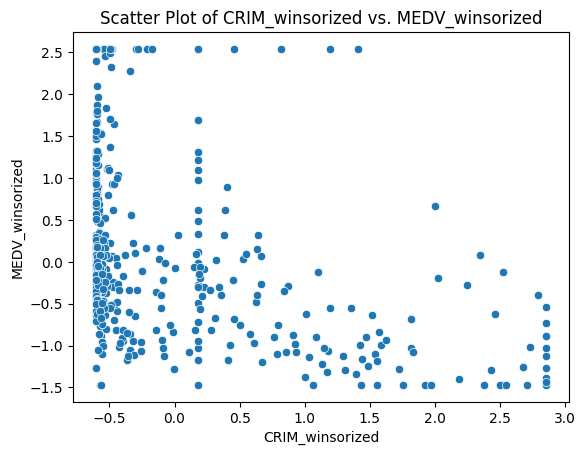

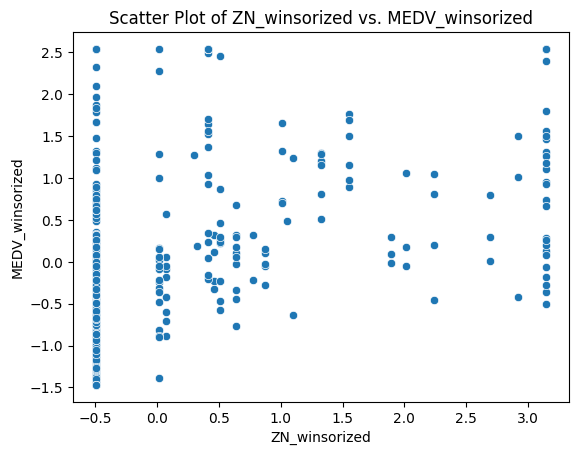

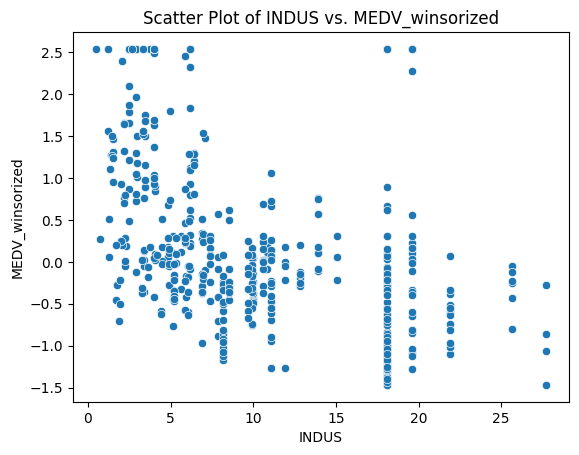

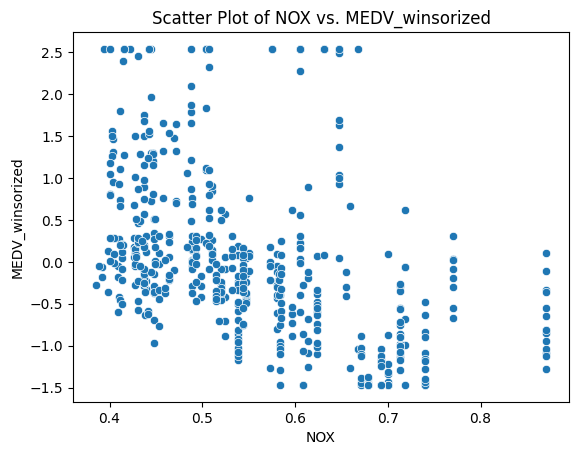

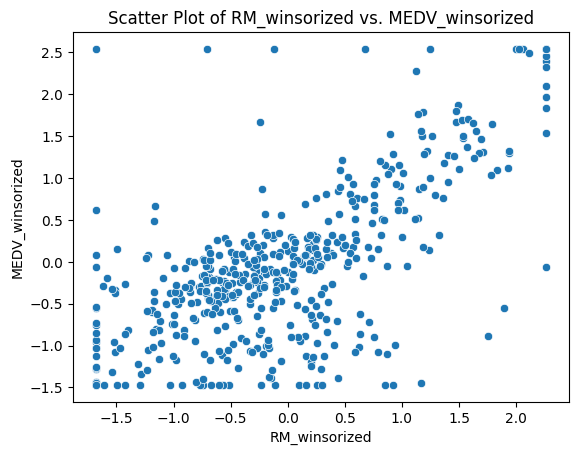

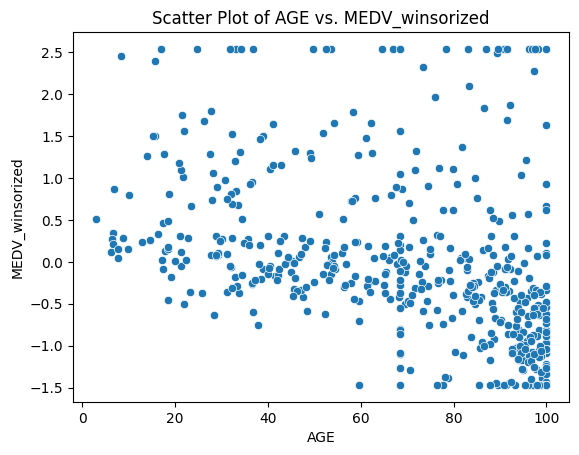

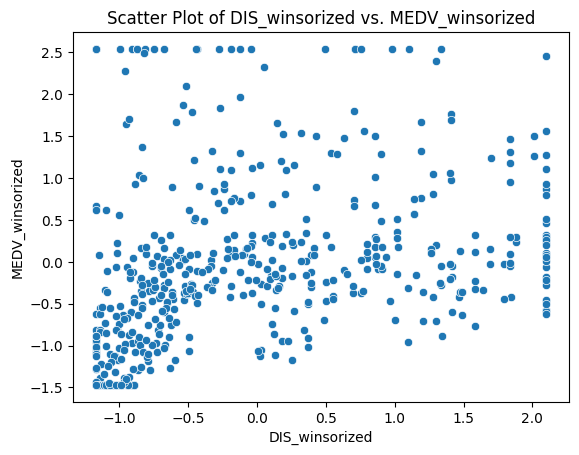

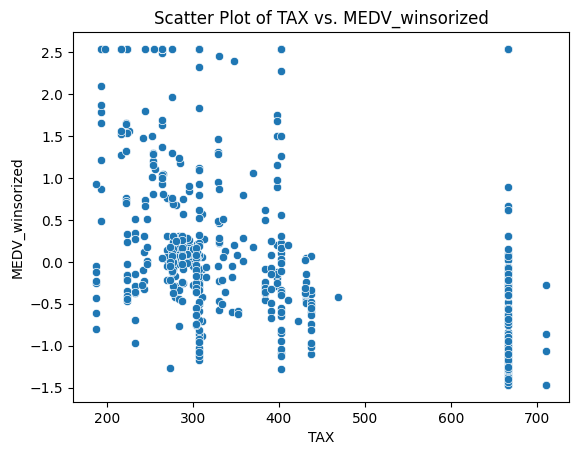

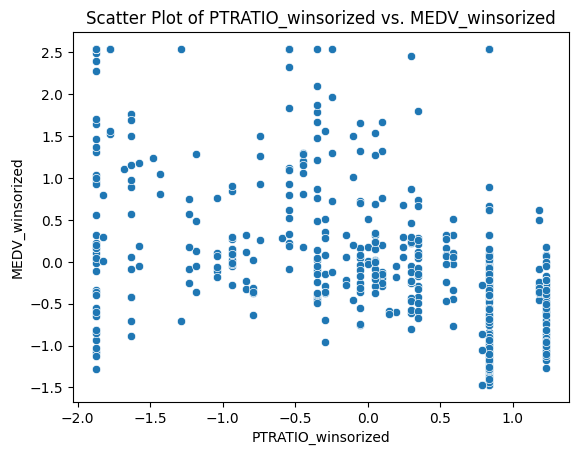

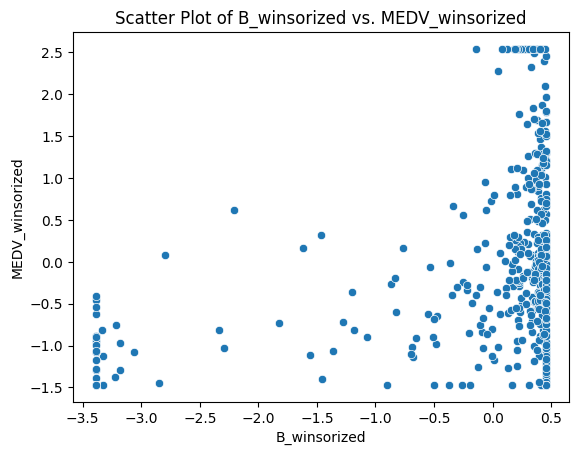

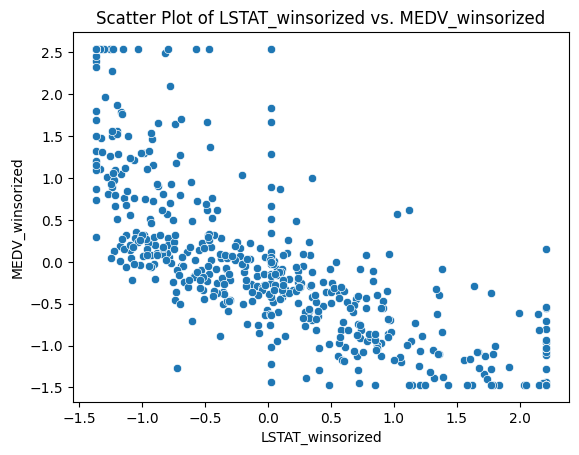

In [16]:
data = df_cols_dropped[['CRIM_winsorized', 'ZN_winsorized', 'INDUS', 'NOX', 'RM_winsorized','AGE', 'DIS_winsorized','TAX','PTRATIO_winsorized','B_winsorized','LSTAT_winsorized','MEDV_winsorized']]

for feature in ['CRIM_winsorized', 'ZN_winsorized', 'INDUS', 'NOX', 'RM_winsorized','AGE', 'DIS_winsorized','TAX','PTRATIO_winsorized','B_winsorized','LSTAT_winsorized']:
    sns.scatterplot(x=feature, y='MEDV_winsorized', data=data)
    plt.xlabel(feature)
    plt.ylabel('MEDV_winsorized')
    plt.title(f'Scatter Plot of {feature} vs. MEDV_winsorized')
    plt.show()

Model Building

In [17]:
from sklearn.model_selection import train_test_split

X = df_cols_dropped.drop('MEDV_winsorized', axis=1)  # Features
y = df_cols_dropped['MEDV_winsorized']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I am going to use a random forest algorithm with gradient  oosting in this dataset as I can see from the plots that the relationships between the features and the target variable MDEV are not straight forward

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.09100941829189185
R-squared: 0.891738302806213


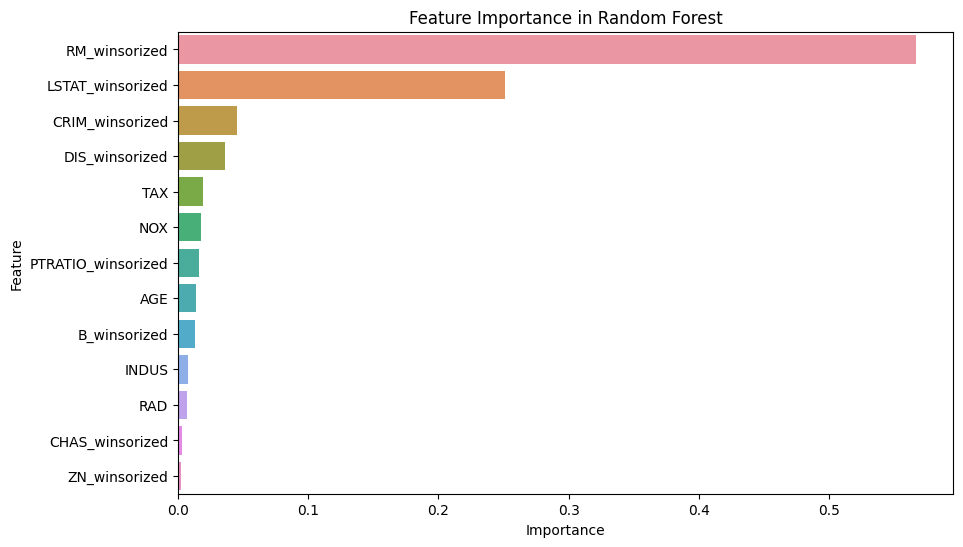

In [20]:
# Check feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

RM (average room per dwelling), LSTAT(percent lower status of the population), and CRIM (crime rate) are the features with the most influence on the values of MDEV (Median value of owner-occupied homes in $1000's). Let's plot them and see how they affect the MDEV

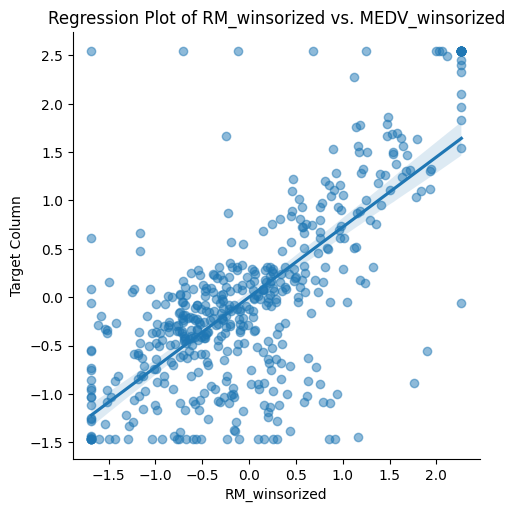

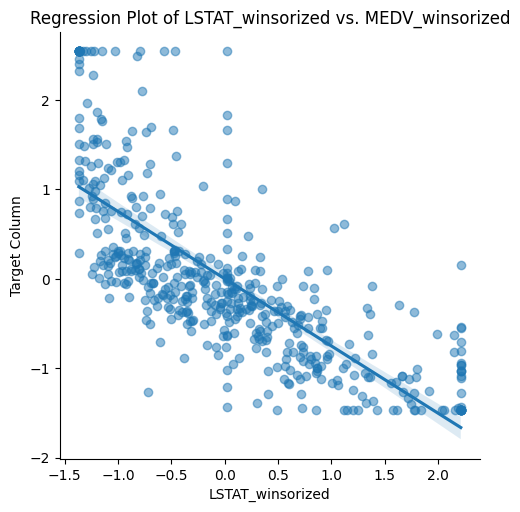

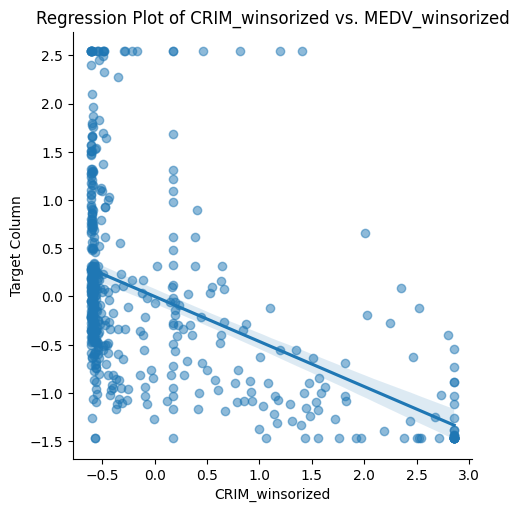

In [21]:
n = 3
top_features = feature_importance_df['Feature'][:n]

for feature in top_features:
    sns.lmplot(x=feature, y='MEDV_winsorized', data=df, scatter_kws={'alpha':0.5})
    plt.xlabel(feature)
    plt.ylabel('Target Column')
    plt.title(f'Regression Plot of {feature} vs. MEDV_winsorized')
    plt.show(2)


Regression plots show that RM and MDEV are positively correlated, LSTAT and MDEV are negatively correlated and CRIM and MDEV are inversely correlated.

Next, I am going to try to improve the model a little by adding gradient boosting to the random forest. Adding gradient boosting to a random forest diversifies the ensemble learning as random forest build multiple decision tress in parallel and gradient boosting builds them sequentially with a focus on where the previous tress performed poorly. Gradient boosting also improves accuracy, and robustness.

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [25]:
# Random Forest evaluation
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Gradient Boosting evaluation
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)

print("Gradient Boosting MSE:", gb_mse)
print("Gradient Boosting R-squared:", gb_r2)

Random Forest MSE: 0.09100941829189185
Random Forest R-squared: 0.891738302806213
Gradient Boosting MSE: 0.08638802668810144
Gradient Boosting R-squared: 0.8972357524967363


Gradient boosting improved our MSE and R-sq values here a little bit - next I am going to use grid search to find the best hyperparameters for both of our algorithms and see if we get better performance.

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [29]:
best_gb_hyperparameters = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4}

best_rf_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42 
)
best_gb_model = GradientBoostingRegressor(
    n_estimators=best_gb_hyperparameters['n_estimators'],
    learning_rate=best_gb_hyperparameters['learning_rate'],
    max_depth=best_gb_hyperparameters['max_depth'],
    min_samples_split=best_gb_hyperparameters['min_samples_split'],
    min_samples_leaf=best_gb_hyperparameters['min_samples_leaf'],
    random_state=42  
)
best_rf_model.fit(X_train, y_train)

best_gb_model.fit(X_train, y_train)

best_rf_predictions = best_rf_model.predict(X_test)

best_gb_predictions = best_gb_model.predict(X_test)

best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_r2 = r2_score(y_test, best_rf_predictions)

best_gb_mse = mean_squared_error(y_test, best_gb_predictions)
best_gb_mse = mean_squared_error(y_test, best_gb_predictions)
best_gb_r2 = r2_score(y_test, best_gb_predictions)

print("Best Random Forest Model Evaluation:")
print("Mean Squared Error (MSE):", best_rf_mse)
print("R-squared (R2) Score:", best_rf_r2)

print("\nBest Gradient Boosting Model Evaluation:")
print("Mean Squared Error (MSE):", best_gb_mse)
print("R-squared (R2) Score:", best_gb_r2)

Best Random Forest Model Evaluation:
Mean Squared Error (MSE): 0.0968826964900529
R-squared (R2) Score: 0.884751651558923

Best Gradient Boosting Model Evaluation:
Mean Squared Error (MSE): 0.07008826206243715
R-squared (R2) Score: 0.9166253960671852


Model Evaluation and Interpretation

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [31]:
k_folds = 5

scoring = 'neg_mean_squared_error'
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

cv_scores = cross_val_score(gb_model, X, y, cv=kf, scoring=scoring)
cv_scores = -cv_scores

mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"Mean Cross-Validated MSE: {mean_cv_score:.4f}")
print(f"Standard Deviation of Cross-Validated MSE: {std_cv_score:.4f}")

Mean Cross-Validated MSE: 0.1086
Standard Deviation of Cross-Validated MSE: 0.0172


In [32]:
mse = mean_squared_error(y_test, best_gb_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, best_gb_predictions)
r2 = r2_score(y_test, best_gb_predictions)
feature_importances = best_gb_model.feature_importances_

In [33]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Mean Squared Error (MSE): 0.07008826206243715
Root Mean Squared Error (RMSE): 0.2647418781803082
Mean Absolute Error (MAE): 0.2107764393690164
R-squared (R2) Score: 0.9166253960671852
Feature Importances:
INDUS: 0.0069
NOX: 0.0288
AGE: 0.0153
RAD: 0.0051
TAX: 0.0136
CRIM_winsorized: 0.0494
ZN_winsorized: 0.0012
CHAS_winsorized: 0.0017
RM_winsorized: 0.5803
DIS_winsorized: 0.0371
PTRATIO_winsorized: 0.0136
B_winsorized: 0.0098
LSTAT_winsorized: 0.2368


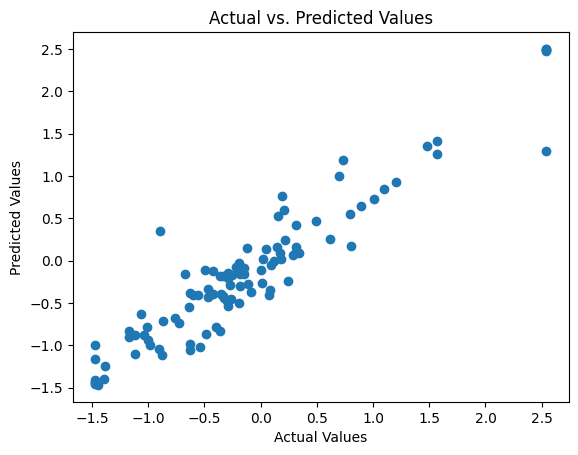

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

The actual values vs. the perdicted values show very good linear correlation

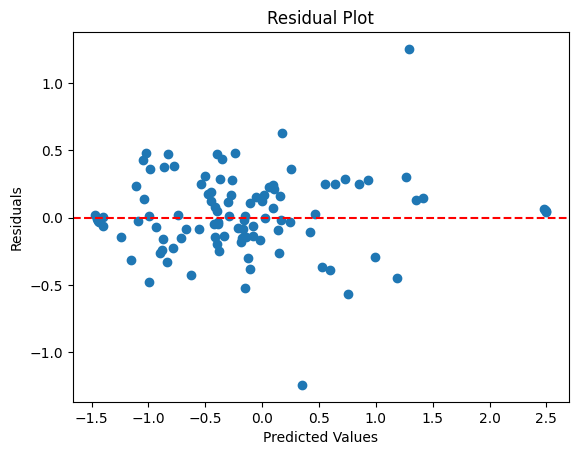

In [35]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()

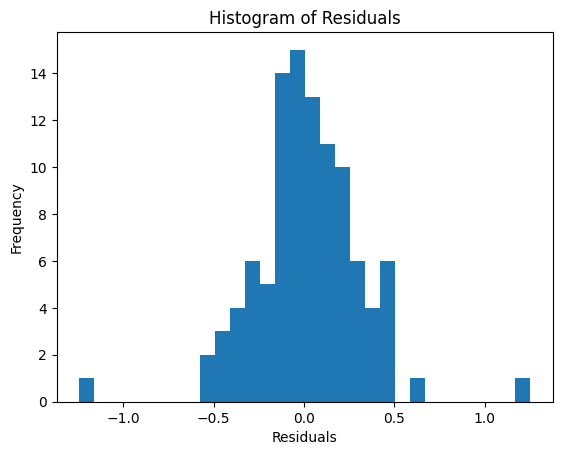

In [36]:
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

histogram of the residuals has a normal distribution and is roughly symmetrical histogram centered around zero suggesting that the model's assumptions are met.